In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
import os
print(os.getcwd())

C:\Users\mihre


In [19]:
df = pd.read_csv('matches.csv')

In [20]:
print(df.head())

    Season  Tour        Date      Time     Opponent  HoAw  ArsenalScore  \
0  2017/18     1  2017-08-11  20:45:00    Leicester  home             4   
1  2017/18     2  2017-08-19  18:30:00   Stoke City  away             0   
2  2017/18     3  2017-08-27  17:00:00    Liverpool  away             0   
3  2017/18     4  2017-09-09  16:00:00  Bournemouth  home             3   
4  2017/18     5  2017-09-17  14:30:00      Chelsea  away             0   

   OpponentScore           Stadium  Attendance          Coach         Referee  
0              3  Emirates Stadium       59387  Arsène Wenger       Mike Dean  
1              1    bet365 Stadium       29459  Arsène Wenger  Andre Marriner  
2              4           Anfield       53206  Arsène Wenger    Craig Pawson  
3              0  Emirates Stadium       59262  Arsène Wenger  Anthony Taylor  
4              0   Stamford Bridge       41478  Arsène Wenger  Michael Oliver  


In [21]:
df = pd.read_csv('matches.csv')
print("Columns:", df.columns.tolist())
print("Sample Date strings:", df['Date'].astype(str).head(10).tolist())
print("Sample Time strings:", df['Time'].astype(str).head(10).tolist())

Columns: ['Season', 'Tour', 'Date', 'Time', 'Opponent', 'HoAw', 'ArsenalScore', 'OpponentScore', 'Stadium', 'Attendance', 'Coach', 'Referee']
Sample Date strings: ['2017-08-11', '2017-08-19', '2017-08-27', '2017-09-09', '2017-09-17', '2017-09-25', '2017-10-01', '2017-10-14', '2017-10-22', '2017-10-28']
Sample Time strings: ['20:45:00', '18:30:00', '17:00:00', '16:00:00', '14:30:00', '21:00:00', '13:00:00', '18:30:00', '14:30:00', '16:00:00']


In [22]:
# Clean Date column (remove hidden spaces and trim)
df['Date_raw'] = df['Date'].astype(str).str.replace('\u00A0', ' ').str.strip()

# Clean Time column (remove hidden spaces and trim)
df['Time_raw'] = df['Time'].astype(str).str.replace('\u00A0', ' ').str.strip()


In [23]:
# Convert Date_raw to datetime (invalid dates become NaT)
parsed_default = pd.to_datetime(df['Date_raw'], errors='coerce')
# Count how many dates failed to parse
print("Default parse failures:", parsed_default.isna().sum())

Default parse failures: 0


In [24]:
parsed_default = pd.to_datetime(df['Date_raw'], errors='coerce')
df['Date'] = parsed_default

In [25]:
def get_result(row):
    if row['ArsenalScore'] > row['OpponentScore']:
        return 'Win'
    elif row['ArsenalScore'] < row['OpponentScore']:
        return 'Loss'
    else:
        return 'Draw'

In [26]:
print(df.head())

    Season  Tour       Date      Time     Opponent  HoAw  ArsenalScore  \
0  2017/18     1 2017-08-11  20:45:00    Leicester  home             4   
1  2017/18     2 2017-08-19  18:30:00   Stoke City  away             0   
2  2017/18     3 2017-08-27  17:00:00    Liverpool  away             0   
3  2017/18     4 2017-09-09  16:00:00  Bournemouth  home             3   
4  2017/18     5 2017-09-17  14:30:00      Chelsea  away             0   

   OpponentScore           Stadium  Attendance          Coach         Referee  \
0              3  Emirates Stadium       59387  Arsène Wenger       Mike Dean   
1              1    bet365 Stadium       29459  Arsène Wenger  Andre Marriner   
2              4           Anfield       53206  Arsène Wenger    Craig Pawson   
3              0  Emirates Stadium       59262  Arsène Wenger  Anthony Taylor   
4              0   Stamford Bridge       41478  Arsène Wenger  Michael Oliver   

     Date_raw  Time_raw  
0  2017-08-11  20:45:00  
1  2017-08-19  1

In [27]:
df['Result'] = df.apply(get_result, axis=1)

# Goal Difference
df['GoalDifference'] = df['ArsenalScore'] - df['OpponentScore']

# Check
print(df.head())


    Season  Tour       Date      Time     Opponent  HoAw  ArsenalScore  \
0  2017/18     1 2017-08-11  20:45:00    Leicester  home             4   
1  2017/18     2 2017-08-19  18:30:00   Stoke City  away             0   
2  2017/18     3 2017-08-27  17:00:00    Liverpool  away             0   
3  2017/18     4 2017-09-09  16:00:00  Bournemouth  home             3   
4  2017/18     5 2017-09-17  14:30:00      Chelsea  away             0   

   OpponentScore           Stadium  Attendance          Coach         Referee  \
0              3  Emirates Stadium       59387  Arsène Wenger       Mike Dean   
1              1    bet365 Stadium       29459  Arsène Wenger  Andre Marriner   
2              4           Anfield       53206  Arsène Wenger    Craig Pawson   
3              0  Emirates Stadium       59262  Arsène Wenger  Anthony Taylor   
4              0   Stamford Bridge       41478  Arsène Wenger  Michael Oliver   

     Date_raw  Time_raw Result  GoalDifference  
0  2017-08-11  20:4

In [28]:
print("\nFinal types:")
print(df[['Date','Time','ArsenalScore','OpponentScore','Result','GoalDifference']].dtypes)
print("\nMissing values after cleaning:") 
# checking if there are missing value
print(df.isnull().sum()) 


Final types:
Date              datetime64[ns]
Time                      object
ArsenalScore               int64
OpponentScore              int64
Result                    object
GoalDifference             int64
dtype: object

Missing values after cleaning:
Season            0
Tour              0
Date              0
Time              0
Opponent          0
HoAw              0
ArsenalScore      0
OpponentScore     0
Stadium           0
Attendance        0
Coach             0
Referee           0
Date_raw          0
Time_raw          0
Result            0
GoalDifference    0
dtype: int64


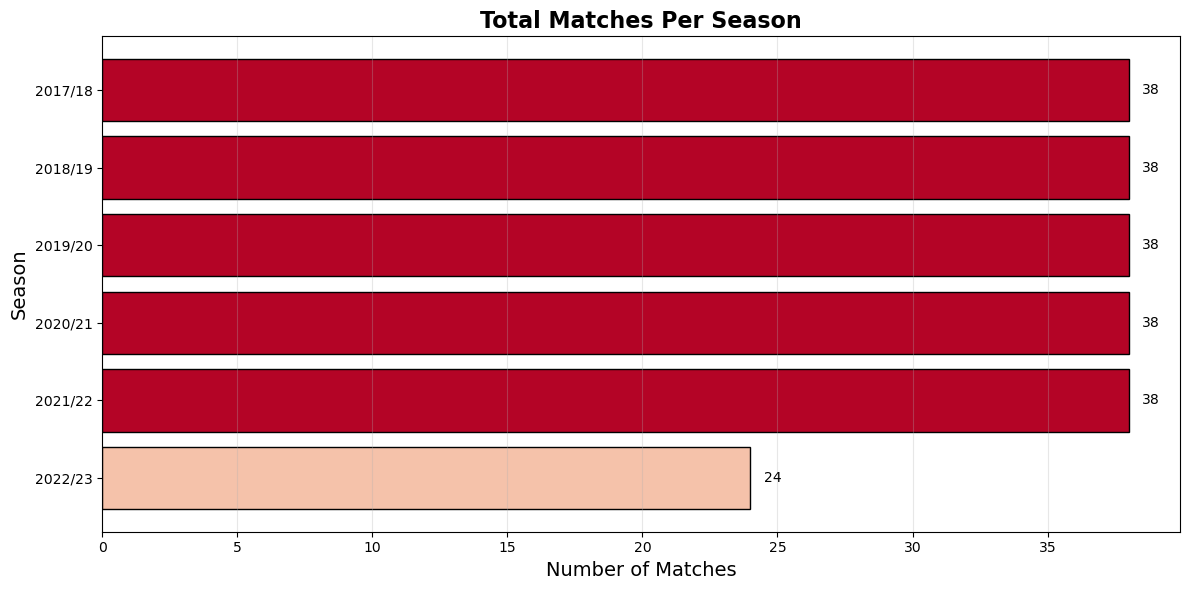

In [43]:
import matplotlib.pyplot as plt

# Count matches per season and sort by season
matches_per_season = df['Season'].value_counts().sort_index()

plt.figure(figsize=(12,6))
colors = plt.cm.coolwarm(matches_per_season.values / max(matches_per_season.values))

# Horizontal bar chart
plt.barh(matches_per_season.index, matches_per_season.values, color=colors, edgecolor='black')

# Titles and labels
plt.title("Total Matches Per Season", fontsize=16, fontweight='bold')
plt.xlabel("Number of Matches", fontsize=14)
plt.ylabel("Season", fontsize=14)

# Annotate bars
for i, val in enumerate(matches_per_season.values):
    plt.text(val + 0.5, i, str(val), va='center', fontsize=10)

plt.gca().invert_yaxis()  # Optional: put the latest season on top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



In [30]:
print(df.columns)

Index(['Season', 'Tour', 'Date', 'Time', 'Opponent', 'HoAw', 'ArsenalScore',
       'OpponentScore', 'Stadium', 'Attendance', 'Coach', 'Referee',
       'Date_raw', 'Time_raw', 'Result', 'GoalDifference'],
      dtype='object')


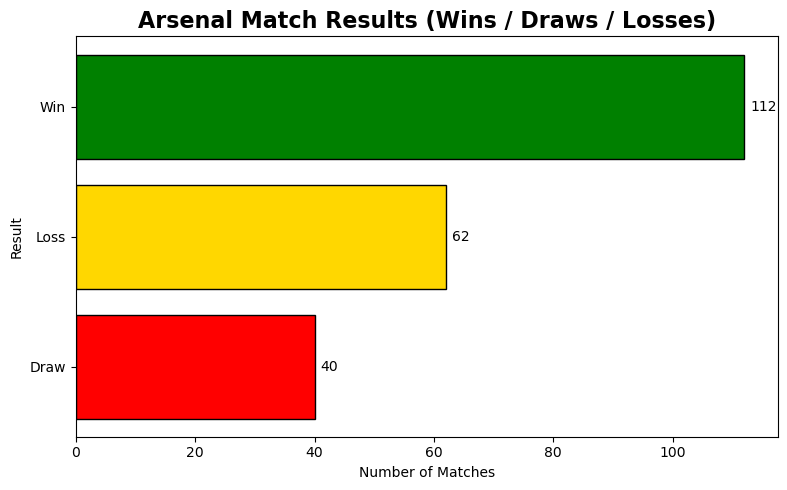

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Clean column names
df.columns = df.columns.str.strip()

# Make sure Result column exists
if 'Result' not in df.columns:
    raise ValueError("No 'Result' column found")

# Count of results
results = df['Result'].value_counts()

# Remove any NaN or infinite values
results = results[np.isfinite(results.values)]

# Horizontal bar chart
plt.figure(figsize=(8,5))
colors = ['green', 'gold', 'red']  # Wins, Draws, Losses

plt.barh(results.index, results.values, color=colors[:len(results)], edgecolor='black')

# Titles and labels
plt.title("Arsenal Match Results (Wins / Draws / Losses)", fontsize=16, fontweight='bold')
plt.xlabel("Number of Matches")
plt.ylabel("Result")

# Annotate bars safely
for i, val in enumerate(results.values):
    if np.isfinite(val):
        plt.text(val + 1, i, str(int(val)), va='center', fontsize=10)

plt.gca().invert_yaxis()  # optional
plt.tight_layout()
plt.show()


In [32]:
print(df.columns)

Index(['Season', 'Tour', 'Date', 'Time', 'Opponent', 'HoAw', 'ArsenalScore',
       'OpponentScore', 'Stadium', 'Attendance', 'Coach', 'Referee',
       'Date_raw', 'Time_raw', 'Result', 'GoalDifference'],
      dtype='object')


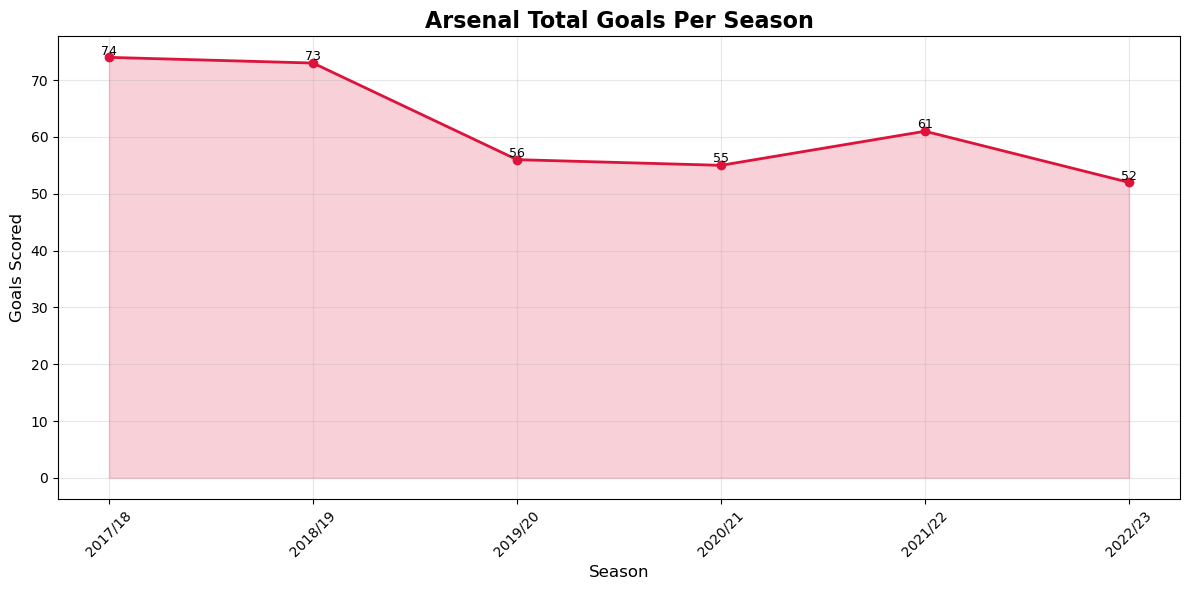

In [33]:

# Sort seasons if needed
goals_per_season = df.groupby('Season')['ArsenalScore'].sum()
goals_per_season = goals_per_season.sort_index()

# Create figure
plt.figure(figsize=(12,6))
plt.plot(goals_per_season.index, goals_per_season.values, 
         marker='o', color='crimson', linewidth=2)

# Add fill for area effect
plt.fill_between(goals_per_season.index, goals_per_season.values, 
                 color='crimson', alpha=0.2)

# Titles and labels
plt.title("Arsenal Total Goals Per Season", fontsize=16, fontweight='bold')
plt.xlabel("Season", fontsize=12)
plt.ylabel("Goals Scored", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add gridlines
plt.grid(alpha=0.3)

# Annotate each point
for i, val in enumerate(goals_per_season.values):
    plt.text(goals_per_season.index[i], val+0.5, str(val), ha='center', fontsize=9)

plt.tight_layout()
plt.show()



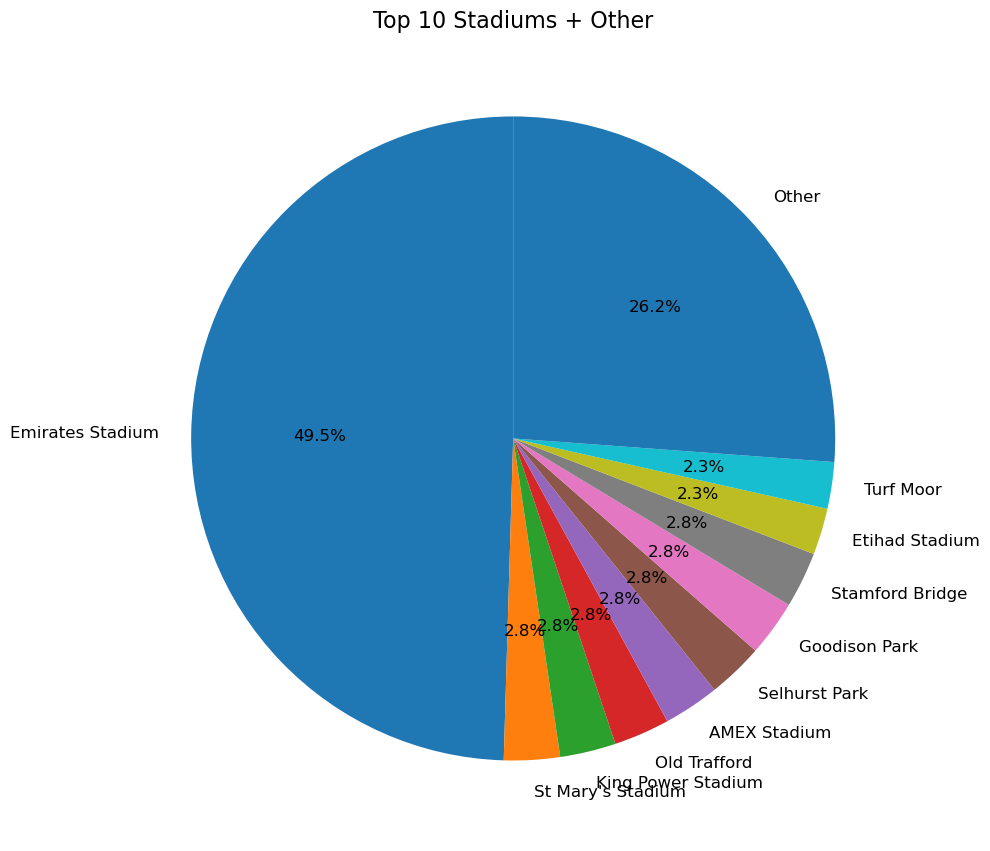

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('matches.csv')
home_away = df['Stadium'].value_counts()  # use the exact column name from your CSV

top_stadiums = home_away.head(10)           # top 10 stadiums
other_sum = home_away[10:].sum()            # sum of remaining stadiums
top_stadiums['Other'] = other_sum           # add as 'Other' category

plt.figure(figsize=(10, 10))
top_stadiums.plot(kind="pie", autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title("Top 10 Stadiums + Other", fontsize=16)
plt.ylabel("")
plt.tight_layout()
plt.show()


In [44]:
print(df.columns.tolist())

['Season', 'Tour', 'Date', 'Time', 'Opponent', 'HoAw', 'ArsenalScore', 'OpponentScore', 'Stadium', 'Attendance', 'Coach', 'Referee', 'Result', 'GoalDifference']


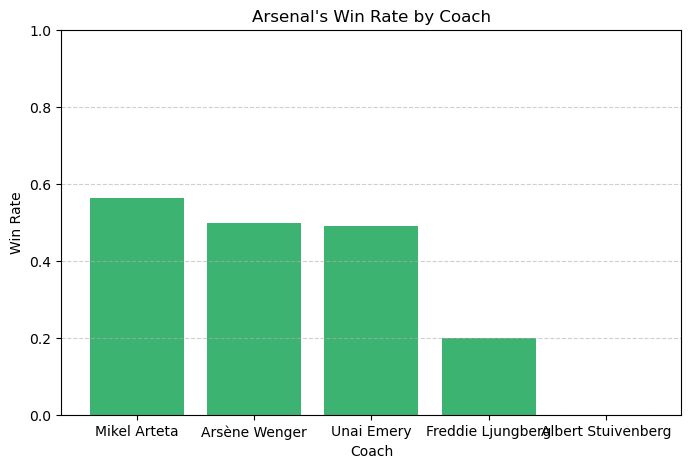

In [46]:
import matplotlib.pyplot as plt

# Create a result column
df['Result'] = df.apply(lambda x: 'Win' if x['ArsenalScore'] > x['OpponentScore'] 
                        else 'Draw' if x['ArsenalScore'] == x['OpponentScore'] 
                        else 'Loss', axis=1)

# Calculate win rate per coach
coach_stats = df.groupby('Coach')['Result'].value_counts().unstack().fillna(0)
coach_stats['Win Rate'] = coach_stats['Win'] / coach_stats.sum(axis=1)

coach_stats = coach_stats.sort_values('Win Rate', ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.bar(coach_stats.index, coach_stats['Win Rate'], color='mediumseagreen')
plt.title("Arsenal's Win Rate by Coach")
plt.xlabel('Coach')
plt.ylabel('Win Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



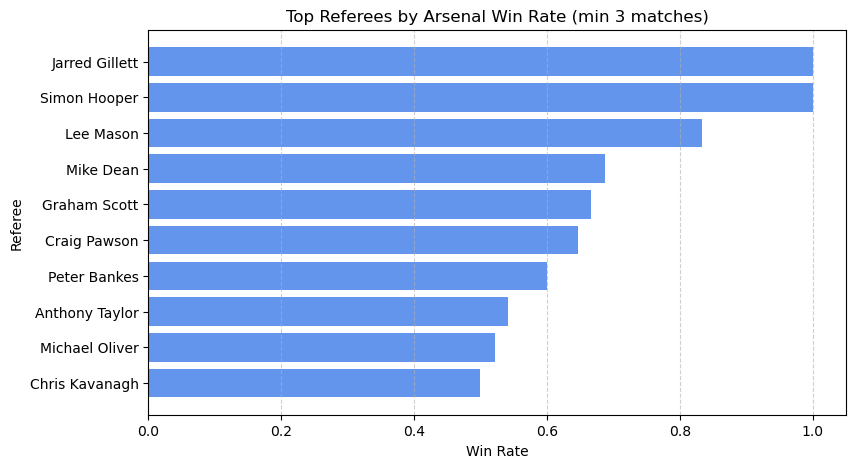

In [47]:
# Calculate win rate per referee
ref_stats = df.groupby('Referee')['Result'].value_counts().unstack().fillna(0)
ref_stats['Win Rate'] = ref_stats['Win'] / ref_stats.sum(axis=1)
ref_stats = ref_stats[ref_stats.sum(axis=1) >= 3]  # Only referees with 3+ matches
ref_stats = ref_stats.sort_values('Win Rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(9,5))
plt.barh(ref_stats.index, ref_stats['Win Rate'], color='cornflowerblue')
plt.title("Top Referees by Arsenal Win Rate (min 3 matches)")
plt.xlabel('Win Rate')
plt.ylabel('Referee')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


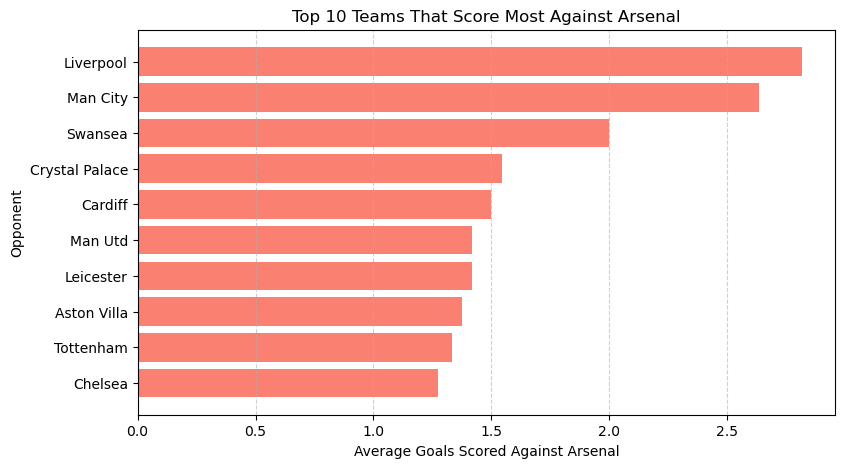

In [48]:
# Average goals conceded per opponent
goals_against = df.groupby('Opponent')['OpponentScore'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(9,5))
plt.barh(goals_against.index, goals_against.values, color='salmon')
plt.title('Top 10 Teams That Score Most Against Arsenal')
plt.xlabel('Average Goals Scored Against Arsenal')
plt.ylabel('Opponent')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()
